<a href="https://colab.research.google.com/github/JosenildoJunior/Competicao_ML/blob/main/11%C2%AA_CompeticaoFLAI_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Previsão de aprovação de empréstimos**

##*Esse projeto tem como objetivos identificar o perfil do tomador de empréstimo e decidir se um novo empréstimo poderá ser feito pelo cliente.*

Para a resolução dessa problemática o projeto foi dividido nas seguintes etapas:

* 1.   Entendimento do problema
* 2.   Obtenção dos dados
* 3.   Analise exploratória e Visualização dos dados
* 4.   Pré-Processamento
* 5.   Modelos de Machine Learning e Avaliação do modelo
* 6.   Tratamento e previsão nos dados de teste

# **1. Entendimento do problema**

O departamento de crédito de um banco deseja automatizar o processo de tomada de
decisão para a aprovação de empréstimos fiduciários. Sua missão é avaliar um conjunto
de dados sobre o tomador do empréstimo e decidir se um novo empréstimo poderá ser
feito.

# **2. Obtenção dos dados**

O departamento de crédito de um banco deseja automatizar o processo de tomada de
decisão para a aprovação de empréstimos fiduciários. Sua missão é avaliar um conjunto
de dados sobre o tomador do empréstimo e decidir se um novo empréstimo poderá ser
feito.


**Permitindo o acesso do Google Colab ao Drive**

  Esse passo é necessário para que seja possivel importar dados diretamente do drive

In [313]:
# "Montando" o drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importando as bibliotecas**

**Para fazer as analises é necessario importar algumas bibliotecas previamente, nesse caso estou importando o pandas para manipulação de dados, também estão sendo importadas o pyplot e o seaborn para visualização dos dados.**

In [314]:
# Importações iniciais
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Importação dos dados**

In [315]:
# Fonte:

# Dados de treino
df = pd.read_csv('/content/drive/MyDrive/Dados/treinoFLAI_competicao.csv')

# Ajustando a ordem das colunas DF
df.sort_index(axis=1, inplace = True)

# Visualizando as primeiras linhas do DF
df.head()

,Atrasos,Cliente,Emprego,Empréstimo,Finalidade,LC-Atual,LC-Recente,Negativos,RDS,TempoCliente,TempoEmprego,ValorDoBem
0,1.0,bom pagador,Outros,19468.0,Reforma,33.0,0.0,0.0,39.2%,185.6,0.50,309447.00
1,0.0,bom pagador,Outros,91688.0,Diversas,41.0,1.0,0.0,NaN,234.5,15.25,449020.00
2,0.0,bom pagador,Outros,34226.0,Reforma,10.0,0.0,0.0,37.2%,250.5,1.25,164394.70
3,0.0,bom pagador,Outros,48356.0,Diversas,26.0,3.0,1.0,29.0%,230.4,2.25,270592.64
4,0.0,bom pagador,Professional,64684.0,Diversas,18.0,0.0,0.0,21.0%,93.6,3.75,78167.16


*No conjunto de dados temos as seguintes variáveis*
* Cliente [Variável Resposta]: bom pagador é aquele que pagou a sua dívida corretamente, mau
pagador é aquele que não pagou ou teve atrasos muito grandes em seu pagamento.
* Empréstimo: Valor emprestado ao cliente.
* ValorDoBem: Valor do bem que o cliente está colocando como garantia (em geral, são imóveis).
* Finalidade: Motivo pelo qual o empréstimo está sendo tomado.
* Emprego: Tipo de emprego do cliente.
* TempoEmprego: Tempo em anos que o cliente tem no seu emprego atual.
* Negativos: Número de prerrogativas negativas do cliente (por exemplo, pendências com IPTU,
IPVA, conta de luz, cartão de crédito, etc).
* Atrasos: Número de linhas de crédito que o cliente já entrou em atraso.
* TempoCliente: Tempo do cliente na instituição (em meses).
* LC-Recente: Número de linhas de crédito recentes (adquiridas nos últimos 2 anos).
* LC-Atual: Número de linhas de crédito atuais.
* RDS: Relação Débito/Salário - A porcentagem do salário anual do cliente comprometida em débitos.

# **3. Analise exploratória dos dados**





**Objetivos**:

* Identificar o tipo de cada variável (numérica, categórica, temporal)
* Identificar qual é a variável target (alvo) para o nosso problema
* Exploração dos dados (medidas descritivas, distribuição das variáveis)
* Visualizar os dados para identificar padrões de fraudes

In [316]:
# Visão geral dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3300 entries, 0 to 3299
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Atrasos       3198 non-null   float64
 1   Cliente       3300 non-null   object 
 2   Emprego       3300 non-null   object 
 3   Empréstimo    3300 non-null   float64
 4   Finalidade    3300 non-null   object 
 5   LC-Atual      3300 non-null   float64
 6   LC-Recente    3300 non-null   float64
 7   Negativos     3122 non-null   float64
 8   RDS           2647 non-null   object 
 9   TempoCliente  3300 non-null   float64
 10  TempoEmprego  3122 non-null   float64
 11  ValorDoBem    3300 non-null   float64
dtypes: float64(8), object(4)
memory usage: 309.5+ KB


*A variável 'RDS' está como texto mesmo ela sendo numerica sendo assim se faz necessario a conversão da mesma*

In [317]:
# Retirando a % e transformando a coluna para tipo numerico
df = df.replace (regex = '%', value = '', inplace = False )
df['RDS'] = pd.to_numeric(df['RDS'])

In [318]:
# Observando as dimensões do DataFrame
df.shape

(3300, 12)

É possível observar que esse dataset tem 3300 entradas e 12 colunas.

Os dados se enquadram em duas categorias:

* **Variáveis numéricas: Empréstimo, ValorDoBem, TempoEmprego, Negativos, Atrasos, TempoCliente, LC-Recente, LC-Atual e RDS.**

* **Variáveis categóricas: Finalidade, Emprego**

**Identificando a variável alvo:**

O objetivo é é avaliar os dados sobre o tomador do empréstimo e decidir se um novo empréstimo poderá ser feito. Assim, a variável **'Cliente'** é a variável adequada para alcançar os objetivos propostos.

In [319]:
# Observando os dados
df.describe()

,Atrasos,Empréstimo,LC-Atual,LC-Recente,Negativos,RDS,TempoCliente,TempoEmprego,ValorDoBem
count,3198.000000,3300.000000,3300.000000,3300.000000,3122.000000,2647.000000,3300.000000,3122.000000,3.300000e+03
mean,0.413696,58841.030909,21.763333,1.153333,0.212684,34.093578,182.681818,9.475208,3.256274e+05
std,1.087892,34109.356093,9.900538,1.695742,0.726832,8.710832,86.159247,7.540252,1.757902e+05
min,0.000000,4710.000000,0.000000,0.000000,0.000000,2.800000,1.100000,0.000000,2.512000e+04
25%,0.000000,35796.000000,15.000000,0.000000,0.000000,29.200000,119.450000,3.500000,2.151960e+05
50%,0.000000,52438.000000,20.000000,1.000000,0.000000,35.200000,177.200000,7.750000,2.884828e+05
75%,0.000000,73162.000000,27.000000,2.000000,0.000000,39.250000,232.750000,13.750000,3.800829e+05
max,15.000000,279460.000000,67.000000,18.000000,10.000000,201.300000,1170.200000,41.250000,2.687554e+06


Nossos clientes tem em média 58 mil em emprestimos, os clientes têm em média 9 anos em empregos, a maioria dos clientes não tem muitas prerrogativas negativas, os clientes não costumam atrasar muito suas linhas de créditos, nossos clientes têm em média 182 meses como clientes, nos últimos 2 anos nossos clientes pegaram em média uma linha de crédito e atualmente nossos clientes tem em média 21 linhas de créditos.

## Alterando os valores da variável alvo

O tipo da variável alvo está como categórica, isso pode dificultar o funcionamento do modelo que vai ser criado, sendo assim faz se necessário um tratamento nessa variável.

In [320]:
# Observando os valores presentes na variável
df['Cliente'].value_counts(normalize = True)

bom pagador    0.813939
mau pagador    0.186061
Name: Cliente, dtype: float64

*Podemos notar que na base temos 81,39% de bons pagadores equanto os outros 18,60% são maus pagadores*

Criando função para realizar o tratamento necessário na variável 'Cliente'

In [321]:
# Criando uma função para substituir os valores
def aux(x):
    if x == 'bom pagador':
        return 0
    elif x == 'mau pagador':
        return 1

# Aplicando a função na coluna cliente
df['Cliente'] = df['Cliente'].apply(aux)

*Conferindo como ficou a variável após a função ter sido aplicada.*

In [322]:
# Observando os valores presentes na variável
df['Cliente'].value_counts()

0    2686
1     614
Name: Cliente, dtype: int64

*Agora que a variável esta devidamente tratada podemos prosseguir*

## **Criando um dataset apenas com as variaveis númericas.**

 O objetivo da criação desse novo dataset é a observação da correlação entre as variaveisa a partir de uma matriz de correlação.

In [323]:
# Criando um dataset apenas com as variaveis númericas e acrescentando a variavel churn para observar a correlação entre as outras
df_num = df[['Atrasos', 'Empréstimo', 'LC-Atual', 'LC-Recente', 'Negativos', 'RDS', 'TempoCliente', 'TempoEmprego', 'ValorDoBem']]

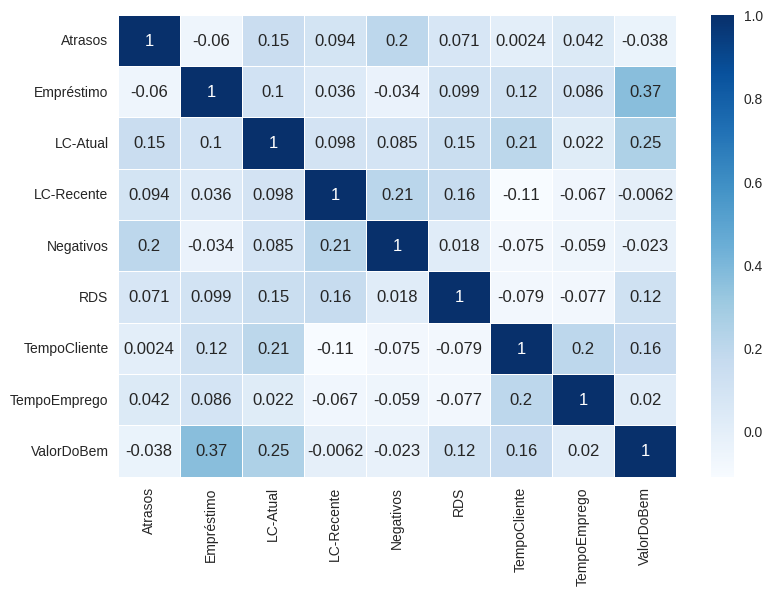

In [324]:
# Criando a matriz
plt.figure(figsize=(9,6))
sns.heatmap(df_num.corr(),annot = True, cmap='Blues',linewidth=.5);

* É possível observar uma correlação positiva entre a variável alvo 'Cliente' e as variáveis 'Negativos', 'Atrasos' e 'LC-Recente' sendo que a maior correlação é entre 'Cliente' e 'Atrasos', seguido por 'Cliente e Negativos'. Por se tratar de uma correlação positiva podemos afirmar que enquanto uma variável aumenta a outra também vai aumentar, ou seja, elas tendem a se mover na mesma direção.

* Vale destacar que a maior correlação que temos é entre a variável 'ValorDoBem' e 'Empréstimo', também apresentam uma correlação positiva.

## Variáveis que apresentaram maiores correlações em relação à variável alvo.

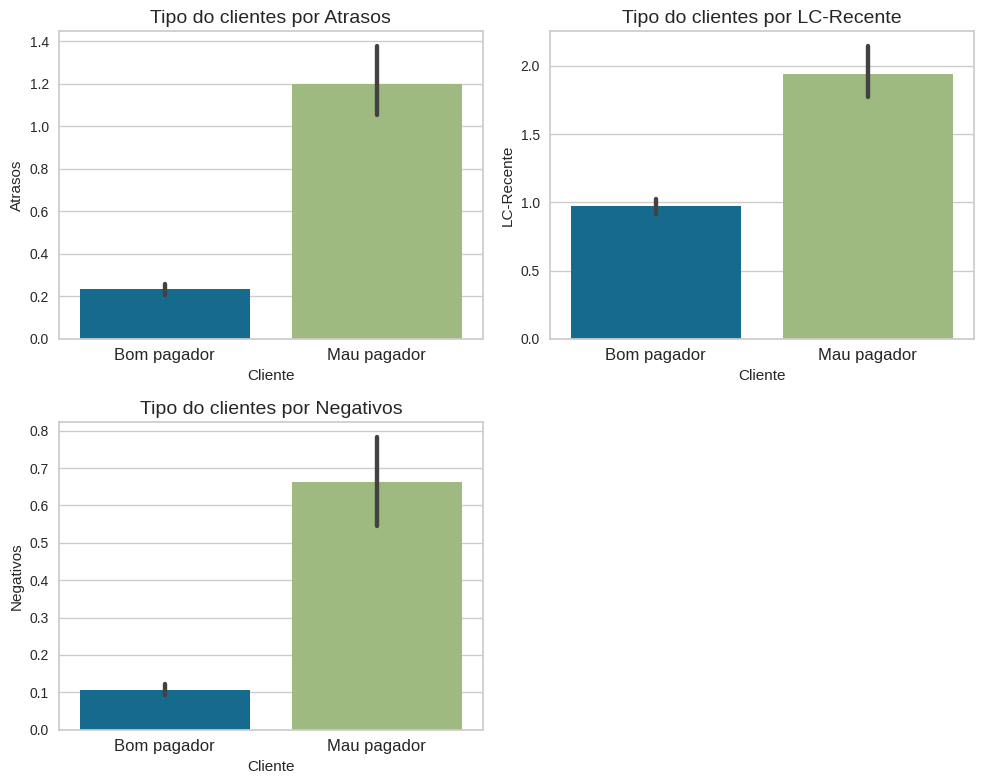

In [325]:
# Dimensões da figura
plt.figure(figsize=(10, 8))

# Grafico 1
plt.subplot(2,2,1)
# Criando o gráfico
grafico = sns.barplot(data=df, x='Cliente', y='Atrasos')

# Renomeando o index do eixo
grafico.set_xticklabels(['Bom pagador', 'Mau pagador'])

# Definindo o titudo do grafico
grafico.set_title('Tipo do clientes por Atrasos', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)



# Grafico 2
plt.subplot(2,2,2)

# Criando o gráfico
grafico = sns.barplot(data=df, x='Cliente', y='LC-Recente')

# Renomeando o index do eixo
grafico.set_xticklabels(['Bom pagador', 'Mau pagador'])

# Definindo o titudo do grafico
grafico.set_title('Tipo do clientes por LC-Recente', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)



# Grafico 3
plt.subplot(2,2,3)

grafico = sns.barplot(data=df, x='Cliente', y='Negativos')

# Renomeando o index do eixo
grafico.set_xticklabels(['Bom pagador', 'Mau pagador'])

# Definindo o titudo do grafico
grafico.set_title('Tipo do clientes por Negativos', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)

plt.tight_layout()

Quanto maior o número de linhas de créditos atrasadas maiores são as chances do cliente ser um mau pagador, o mesmo se aplica aos clientes, com prerrogativas negativas e os clientes que adquiriram linhas de créditos recentes tendem a ser mau pagadores também.

## Variáveis que apresentaram menores correlações em relação à variável alvo.

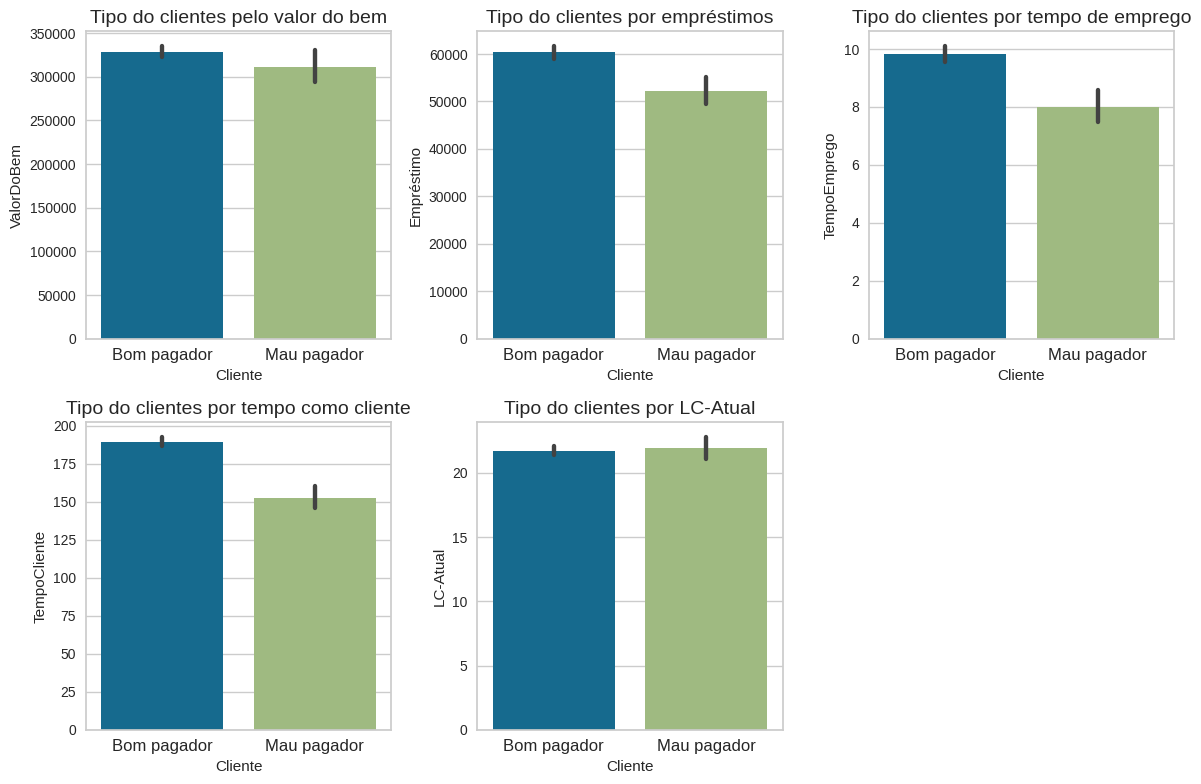

In [326]:
# Dimensões da figura
plt.figure(figsize=(12, 8))

# Gráfico 1
plt.subplot(2,3,1)

# Criando o gráfico
grafico = sns.barplot(data=df, x='Cliente', y='ValorDoBem')

# Renomeando o index do eixo
grafico.set_xticklabels(['Bom pagador', 'Mau pagador'])

# Definindo o titudo do grafico
grafico.set_title('Tipo do clientes pelo valor do bem', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)



# Gráfico 2
plt.subplot(2,3,2)

# Criando o gráfico
grafico = sns.barplot(data=df, x='Cliente', y='Empréstimo')

# Renomeando o index do eixo
grafico.set_xticklabels(['Bom pagador', 'Mau pagador'])

# Definindo o titudo do grafico
grafico.set_title('Tipo do clientes por empréstimos', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)



# Gráfico 3
plt.subplot(2,3,3)

# Criando o gráfico
grafico = sns.barplot(data=df, x='Cliente', y='TempoEmprego')

# Renomeando o index do eixo
grafico.set_xticklabels(['Bom pagador', 'Mau pagador'])

# Definindo o titudo do grafico
grafico.set_title('Tipo do clientes por tempo de emprego', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)


# Gráfico 4
plt.subplot(2,3,4)

# Criando o gráfico
grafico = sns.barplot(data=df, x='Cliente', y='TempoCliente')

# Renomeando o index do eixo
grafico.set_xticklabels(['Bom pagador', 'Mau pagador'])

# Definindo o titudo do grafico
grafico.set_title('Tipo do clientes por tempo como cliente', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)



# Gráfico 5
plt.subplot(2,3,5)

# Criando o gráfico
grafico = sns.barplot(data=df, x='Cliente', y='LC-Atual')

# Renomeando o index do eixo
grafico.set_xticklabels(['Bom pagador', 'Mau pagador'])

# Definindo o titudo do grafico
grafico.set_title('Tipo do clientes por LC-Atual', fontsize=14)

# Defininfo o tamnho do index do eixo
plt.xticks(fontsize=12)


plt.tight_layout()

*Podemos confirmar agora que essas variáveis não são tão impactantes em relação à variável alvo*

**Algumas anotações a respeito:**

*Podemos observar que quanto mais antigo o cliente maiores são as chances de que ele seja um bom pagador, quanto mais tempo o cliente tem de trabalho menores são as chances de que ele seja um mau pagador*

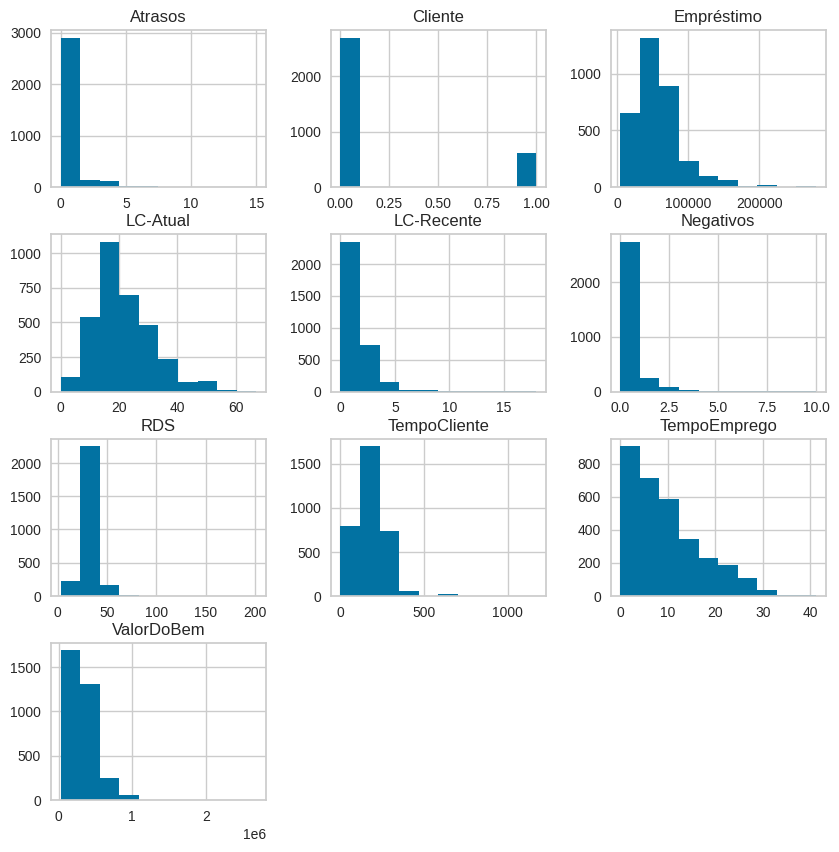

In [327]:
# Criando um histograma com todas as colunas do dataset
df.hist(figsize=(10,10));

* Podemos observar que na variável cliente

* Tempo Emprego é notável uma assimetria a direita, onde a maioria de nossos dados estão entre zero e 13 anos.

* Nota-se uma assimetria à direita na variável empréstimo, a maioria dos dados esta entre 0 e 70.000.

* Em valor do bem a maioria dos nossos dados estão entre 0 e 3 milhões.

* Na variável negativos observa-se menos de 75% dos clientes apresentam algum tipo de prerrogativas negativas.

* O mesmo se aplica aos clientes com algum tipo de atraso, os clientes que apresentam algum tipo de atraso representa menos de 75% da base de dados.

* Nossos clientes têm em média cerca de 182 meses como cliente, sendo que a maioria dos clientes está entre 1 mês e 232 meses.

* Nos últimos 2 anos 75% dos nossos clientes não tem mais que 2 linhas de créditos adquiridas, enquanto a maioria dos nossos.

* Podemos notar uma concentração nos dados por volta de 15 e 27, evidenciando que a maioria dos nossos clientes tem entre 15 e 27 linhas ativas.

# **4. Pré-Processamento**

Objetivos:

* Eliminar as variáveis que não serão utilizadas;
* Identificação de dados ausentes;
* Escala das Variáveis;


## **A. Eliminando variavies que não serão utilizadas.**

Por mais que algumas variáveis apresentem poucas influências, nenhuma delas pode ser descartada do dataset atualmente, então não existem variáveis a serem descartadas.

## **B. Tratando dados ausentes**

A estrategia de tratamento dessas variaveis consiste em pegar a media dos valores do agrupamento de duas colunas

In [328]:
# Criando uma copia do DF de treino
df_medias = df.copy()

In [329]:
df_medias.groupby(['LC-Atual', 'LC-Recente'])[ 'RDS' ].mean()

LC-Atual  LC-Recente
0.0       0.0           40.2
1.0       0.0           35.2
          1.0            NaN
2.0       0.0           33.8
          1.0           23.2
                        ... 
63.0      2.0           39.4
65.0      1.0           42.9
66.0      0.0            NaN
          2.0           39.5
67.0      0.0            NaN
Name: RDS, Length: 337, dtype: float64

In [330]:
df_medias.groupby(['TempoCliente', 'Emprego'])[ 'ValorDoBem' ].mean()

TempoCliente  Emprego     
1.1           Outros          188400.00
3.4           Gerente          86067.40
10.4          Outros          214270.46
11.5          Outros           45530.00
11.6          Outros          213520.00
                                ...    
636.8         Professional    308731.08
641.4         Professional    304049.34
651.9         Professional    322864.22
1156.2        Outros          488270.00
1170.2        Outros          495520.26
Name: ValorDoBem, Length: 2807, dtype: float64

In [331]:
df_medias.groupby(['Atrasos', 'LC-Recente'])[ 'Negativos' ].mean()

Atrasos  LC-Recente
0.0      0.0           0.098706
         1.0           0.144246
         2.0           0.228261
         3.0           0.088608
         4.0           0.226415
                         ...   
10.0     1.0           0.000000
         3.0                NaN
11.0     0.0           0.000000
13.0     3.0                NaN
15.0     3.0           2.000000
Name: Negativos, Length: 76, dtype: float64

In [332]:
df_medias.groupby(['Negativos', 'LC-Atual'])[ 'Atrasos' ].mean()

Negativos  LC-Atual
0.0        0.0         0.0000
           1.0         0.0000
           2.0         0.5000
           3.0         0.0625
           4.0         0.0000
                        ...  
7.0        54.0        4.0000
8.0        34.0        0.0000
           42.0        3.0000
10.0       9.0         0.0000
           16.0        1.0000
Name: Atrasos, Length: 184, dtype: float64

Agora que já temos as médias agrupadas chegou a hora de preencher os valores ausentes

In [333]:
df_medias["TempoEmprego"] = df_medias["TempoEmprego"].fillna( df_medias.groupby(['Finalidade', 'Emprego'])[ 'TempoEmprego' ].transform('mean') )

df_medias["Negativos"] = df_medias["Negativos"].fillna( df_medias.groupby(['Finalidade', 'Emprego'])[ 'Negativos' ].transform('mean') )

df_medias["Atrasos"] = df_medias["Atrasos"].fillna( df_medias.groupby(['Finalidade', 'Emprego'])[ 'Atrasos' ].transform('mean') )

df_medias["RDS"] = df_medias["RDS"].fillna( df_medias.groupby(['Finalidade', 'Emprego'])[ 'RDS' ].transform('mean') )

In [334]:
def percent_ausentes(df_medias):
    p_faltantes = df_medias.isnull().mean()
    valores_faltantes = pd.DataFrame({'Variavéis': df_medias.columns,
                                           '% de ausentes': p_faltantes}
                                      ).reset_index(drop = True)

    return valores_faltantes.sort_values(by = ['% de ausentes'], ascending = False)

percent_ausentes(df_medias)

,Variavéis,% de ausentes
0,Atrasos,0.0
1,Cliente,0.0
2,Emprego,0.0
3,Empréstimo,0.0
4,Finalidade,0.0
5,LC-Atual,0.0
6,LC-Recente,0.0
7,Negativos,0.0
8,RDS,0.0
9,TempoCliente,0.0


## **C. Escala das Variáveis**

 **Processamento das variáveis categóricas:**

Para que os modelos possam atingir um bom desempenho faz-se necessário a transformação de uma variável categórica para uma variável numérica.

**Processamento das variáveis numéricas:**

Como as variáveis estão em escalas diferentes, isso pode acabar causando problemas nos modelos de Machine Learning, dessa forma o próximo passo vai ser padronizar os dados
das variáveis

### **Coluna Finalidade**

A coluna finalidade é uma variavel categorica, então é necessario que ela passe por um tratamento para que o modelo de machine learning que vai ser criado tenha um melhor desempenho.

In [335]:
# Conferindo os valores em 'Finalidade'
df['Finalidade'].value_counts()

Diversas    2270
Reforma     1030
Name: Finalidade, dtype: int64

In [336]:
# Aplicando a dummyficação de variaveis na coluna finalidade
df_medias['Finalidade'] = pd.get_dummies(df_medias['Finalidade'], drop_first=True, prefix = 'finalidade')

In [337]:
# Conferindo os valores em 'Finalidade'
df_medias['Finalidade'].value_counts()

0    2270
1    1030
Name: Finalidade, dtype: int64

In [338]:
df.head()

,Atrasos,Cliente,Emprego,Empréstimo,Finalidade,LC-Atual,LC-Recente,Negativos,RDS,TempoCliente,TempoEmprego,ValorDoBem
0,1.0,0,Outros,19468.0,Reforma,33.0,0.0,0.0,39.2,185.6,0.50,309447.00
1,0.0,0,Outros,91688.0,Diversas,41.0,1.0,0.0,NaN,234.5,15.25,449020.00
2,0.0,0,Outros,34226.0,Reforma,10.0,0.0,0.0,37.2,250.5,1.25,164394.70
3,0.0,0,Outros,48356.0,Diversas,26.0,3.0,1.0,29.0,230.4,2.25,270592.64
4,0.0,0,Professional,64684.0,Diversas,18.0,0.0,0.0,21.0,93.6,3.75,78167.16


### **Coluna emprego**

No tratamento dessa variavel vai ser necessario utilizar o get_dummies e o resultado sera armazenado em uma nova variavel que posteriormente vai ser inserida de volta no Dataset.

In [339]:
# Observando os valores
df_medias['Emprego'].value_counts()

Outros          1330
Professional     803
Geral            569
Gerente          433
Autônomo          97
Comissionado      68
Name: Emprego, dtype: int64

In [340]:
# Aplicando a dummyficação de variaveis na coluna emprego e armazenando em uma nova variavel
novas_colunas_emprego = pd.get_dummies(df_medias['Emprego'], drop_first=True, prefix = 'emprego')

# Observando os valores
novas_colunas_emprego


,emprego_Comissionado,emprego_Geral,emprego_Gerente,emprego_Outros,emprego_Professional
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,0,1
...,...,...,...,...,...
3295,0,0,0,0,1
3296,0,0,0,0,0
3297,0,0,0,0,1
3298,0,0,0,0,1


In [341]:
# Atribuindo os novos valores em seus respectivos lugares
df_medias['emprego_Comissionado'] = novas_colunas_emprego['emprego_Comissionado']
df_medias['emprego_Geral'] = novas_colunas_emprego['emprego_Geral']
df_medias['emprego_Gerente'] = novas_colunas_emprego['emprego_Gerente']
df_medias['emprego_Outros'] = novas_colunas_emprego['emprego_Outros']
df_medias['emprego_Professional'] = novas_colunas_emprego['emprego_Professional']

In [342]:
# Excluindo a coluna emprego, já que temos a mesma coluna só que particionada
df_medias = df_medias.drop('Emprego', axis = 'columns')

In [343]:
# Observando os valores
df_medias.head()

,Atrasos,Cliente,Empréstimo,Finalidade,LC-Atual,LC-Recente,Negativos,RDS,TempoCliente,TempoEmprego,ValorDoBem,emprego_Comissionado,emprego_Geral,emprego_Gerente,emprego_Outros,emprego_Professional
0,1.0,0,19468.0,1,33.0,0.0,0.0,39.200000,185.6,0.50,309447.00,0,0,0,1,0
1,0.0,0,91688.0,0,41.0,1.0,0.0,34.948077,234.5,15.25,449020.00,0,0,0,1,0
2,0.0,0,34226.0,1,10.0,0.0,0.0,37.200000,250.5,1.25,164394.70,0,0,0,1,0
3,0.0,0,48356.0,0,26.0,3.0,1.0,29.000000,230.4,2.25,270592.64,0,0,0,1,0
4,0.0,0,64684.0,0,18.0,0.0,0.0,21.000000,93.6,3.75,78167.16,0,0,0,0,1


### **Balanceamento das Variáveis**

In [344]:
# Observando o balanceamento dos dados
df_medias.groupby(['Cliente']).count()

,Atrasos,Empréstimo,Finalidade,LC-Atual,LC-Recente,Negativos,RDS,TempoCliente,TempoEmprego,ValorDoBem,emprego_Comissionado,emprego_Geral,emprego_Gerente,emprego_Outros,emprego_Professional
Cliente,,,,,,,,,,,,,,,
0,2686,2686,2686,2686,2686,2686,2686,2686,2686,2686,2686,2686,2686,2686,2686
1,614,614,614,614,614,614,614,614,614,614,614,614,614,614,614


É possivel notar a existencia de um desbalanceamento nos nossos dados, sendo assim se faz necessario a resolução desse situação.

In [345]:
# Fazendo a importação do SMOTE
from imblearn.over_sampling import SMOTE

# Criando o objeto
smote = SMOTE(sampling_strategy = 'all', k_neighbors = 9 )

A conclusão do balanceamento vai ser feito adiante.

#**5. Machine Learning**

In [346]:
# Instalando o Pycaret
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [347]:
# Importando o pycaret
from pycaret.classification import *

In [348]:
# Separando os dados em X e Y

# Variaveis preditoras
x = df_medias.drop(['Cliente'], axis = 'columns')

# Variavel resposta
y = df_medias['Cliente']

In [349]:
# Aplicando os registros da classe balanceada
x_res, y_res = smote.fit_resample(x, y)

In [350]:
# Observando o balanceamento dos dados
y_res.value_counts()

0    2686
1    2686
Name: Cliente, dtype: int64

In [351]:
# Criando o ambiente de treinamento
s = setup(x_res, target = y_res, fold = 20, train_size = 0.8 )

,Description,Value
0,Session id,3396
1,Target,Cliente
2,Target type,Binary
3,Original data shape,"(5372, 16)"
4,Transformed data shape,"(5372, 16)"
5,Transformed train set shape,"(4297, 16)"
6,Transformed test set shape,"(1075, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [352]:
# Avaliando os modelos ordenados pelo F1-score
best = compare_models(sort = 'F1' )

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9658,0.9958,0.9400,0.9912,0.9648,0.9316,0.9331,0.6380
rf,Random Forest Classifier,0.9539,0.9911,0.9367,0.9703,0.9530,0.9078,0.9087,0.7590
xgboost,Extreme Gradient Boosting,0.9539,0.9898,0.9380,0.9691,0.9530,0.9078,0.9087,0.6730
lightgbm,Light Gradient Boosting Machine,0.9509,0.9889,0.9315,0.9693,0.9498,0.9018,0.9028,0.3265
gbc,Gradient Boosting Classifier,0.9155,0.9729,0.8906,0.9379,0.9133,0.8310,0.8326,0.8500
dt,Decision Tree Classifier,0.8909,0.8908,0.8803,0.8996,0.8894,0.7817,0.7827,0.2420
ada,Ada Boost Classifier,0.8869,0.9540,0.8641,0.9066,0.8844,0.7738,0.7754,0.4535
ridge,Ridge Classifier,0.8234,0.0000,0.7262,0.9031,0.8041,0.6467,0.6605,0.1595
lda,Linear Discriminant Analysis,0.8234,0.9125,0.7258,0.9035,0.8039,0.6467,0.6606,0.1195
qda,Quadratic Discriminant Analysis,0.8199,0.9022,0.7380,0.8836,0.8035,0.6398,0.6494,0.1135


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

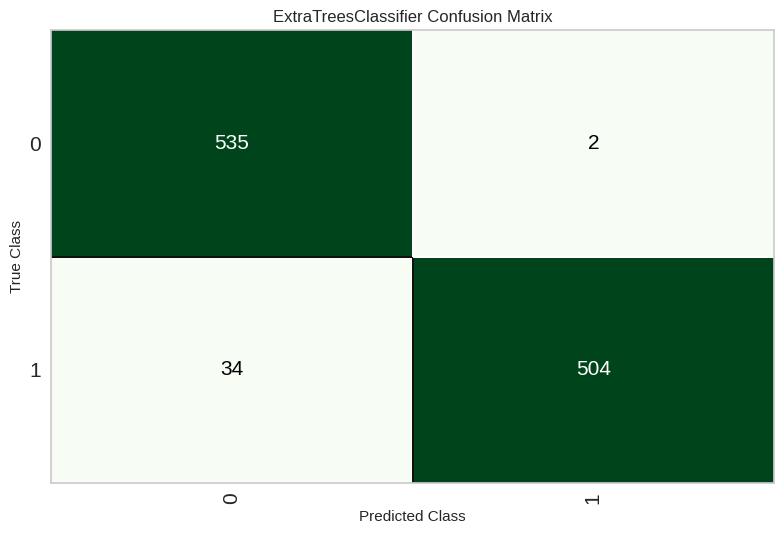

In [353]:
# Criando uma matriz de confusão para avaliar o desempenho do melhor modelo
plot_model(best, plot = 'confusion_matrix')

In [354]:
# Observando as métricas do modelo
predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9665,0.9974,0.9368,0.9960,0.9655,0.9330,0.9347


,Atrasos,Empréstimo,Finalidade,LC-Atual,LC-Recente,Negativos,RDS,TempoCliente,TempoEmprego,ValorDoBem,emprego_Comissionado,emprego_Geral,emprego_Gerente,emprego_Outros,emprego_Professional,Cliente,prediction_label,prediction_score
3894,0.000000,39247.335938,0,11.411882,1.000000,0.798303,34.296421,140.263229,2.168684,116724.328125,0,0,0,0,0,1,1,1.00
862,0.000000,215718.000000,0,23.000000,2.000000,0.000000,31.400000,220.199997,10.750000,914499.875000,0,0,0,0,0,0,0,0.96
2173,0.000000,106446.000000,0,5.000000,1.000000,0.000000,37.500000,113.900002,1.250000,195333.125000,0,0,0,1,0,0,0,0.96
4390,0.975309,114525.992188,0,12.074072,4.349794,0.000000,19.032959,235.480591,6.350825,157116.093750,0,0,0,0,1,1,0,0.57
2926,0.000000,159826.000000,0,25.000000,1.000000,0.000000,36.299999,109.300003,12.750000,198755.718750,0,1,0,0,0,0,0,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2475,0.000000,43018.000000,1,20.000000,0.000000,0.000000,29.500000,309.299988,10.012963,263694.062500,0,0,0,1,0,0,0,0.99
3592,0.000000,62800.000000,0,19.850040,1.221446,0.000000,34.344276,138.609650,2.824980,327887.718750,0,0,0,0,0,1,1,0.98
4773,1.008510,67360.281250,0,26.689432,1.904639,0.547680,36.432636,202.255417,11.269975,388239.156250,0,0,0,0,0,1,1,0.95
3540,0.084305,9684.718750,1,3.770414,11.156945,0.000000,33.021069,17.907213,4.743505,45932.371094,0,0,0,1,0,1,1,0.98


# **6. Tratamento dados de teste**

Essa parte do projeto contem apenas 3 etapas

* 1. *Obtenção dos dados*
* 2. *Pré-Processamento*
* 3. *Previsão nos dados de teste*

## **1. Obtenção dos dados de teste**


**Importando os dados do google drive**

In [355]:
# Dados de teste
teste = pd.read_csv('/content/drive/MyDrive/Dados/testeFLAI_competicao.csv')

In [356]:
# Observando os dados
teste.head()

,Empréstimo,ValorDoBem,Finalidade,Emprego,TempoEmprego,Negativos,Atrasos,TempoCliente,LC-Recente,LC-Atual,RDS
0,82582.0,342542.60,Diversas,Geral,8.00,0.0,0.0,407.7,0.0,43.0,41.3%
1,37680.0,233000.56,Diversas,Geral,6.00,0.0,0.0,100.3,2.0,14.0,25.5%
2,58404.0,218578.54,Reforma,Geral,2.75,0.0,0.0,133.1,0.0,17.0,34.7%
3,33284.0,255630.54,Reforma,Outros,15.75,0.0,0.0,239.8,1.0,35.0,36.7%
4,66882.0,315629.66,Diversas,Geral,7.00,NaN,0.0,101.4,1.0,18.0,34.0%


In [357]:
# Retirando a % e transformando a coluna para tipo numerico
teste = teste.replace (regex = '%', value = '', inplace = False )
teste['RDS'] = pd.to_numeric(teste['RDS'])

In [358]:
# Criando uma copia do DF de teste
df_medias_teste = teste.copy()

## **2. Pré-Processamento nos dados de teste**

### **A. Eliminando variavies que não serão utilizadas.**

Por mais que algumas variáveis apresentem poucas influências, nenhuma delas pode ser descartada do dataset atualmente, então não existem variáveis a serem descartadas.

### **B. Tratando dados ausentes**

A estrategia de tratamento dessas variaveis consiste em pegar a media dos valores do agrupamento de duas colunas

In [359]:
def percent_ausentes(df_medias_teste):
    p_faltantes = df_medias_teste.isnull().mean()
    valores_faltantes = pd.DataFrame({'Variavéis': df_medias_teste.columns,
                                           '% de ausentes': p_faltantes}
                                      ).reset_index(drop = True)

    return valores_faltantes.sort_values(by = ['% de ausentes'], ascending = False)

percent_ausentes(df_medias_teste)

,Variavéis,% de ausentes
10,RDS,0.219412
4,TempoEmprego,0.067059
5,Negativos,0.062941
6,Atrasos,0.025294
0,Empréstimo,0.000000
1,ValorDoBem,0.000000
2,Finalidade,0.000000
3,Emprego,0.000000
7,TempoCliente,0.000000
8,LC-Recente,0.000000


In [360]:
df_medias_teste.groupby(['LC-Atual', 'LC-Recente'])[ 'RDS' ].mean()

LC-Atual  LC-Recente
1.0       0.0            NaN
2.0       0.0           33.6
          1.0           28.0
          2.0            NaN
          3.0            NaN
                        ... 
54.0      1.0           34.9
55.0      0.0           36.2
          3.0            NaN
64.0      0.0           64.8
65.0      2.0            NaN
Name: RDS, Length: 280, dtype: float64

In [361]:
df_medias_teste.groupby(['TempoCliente', 'Emprego'])[ 'ValorDoBem' ].mean()

TempoCliente  Emprego     
1.3           Autônomo        944826.00
3.4           Outros           82079.60
8.4           Autônomo        706500.00
10.9          Professional    426857.88
12.3          Autônomo        959313.96
                                ...    
426.1         Outros          397637.04
429.4         Professional    511524.84
442.9         Professional    518401.44
640.9         Professional    303393.08
649.9         Professional    319199.84
Name: ValorDoBem, Length: 1548, dtype: float64

In [362]:
df_medias_teste.groupby(['Atrasos', 'LC-Recente'])[ 'Negativos' ].mean()

Atrasos  LC-Recente
0.0      0.0           0.094991
         1.0           0.133333
         2.0           0.203390
         3.0           0.148936
         4.0           0.323529
         5.0           0.875000
         6.0           0.428571
         7.0           1.600000
         8.0           0.500000
         9.0           0.200000
         10.0          0.000000
         11.0          0.000000
         12.0          0.333333
1.0      0.0           0.367347
         1.0           0.228571
         2.0           0.441176
         3.0           0.000000
         4.0           1.000000
         5.0           1.250000
         6.0           2.000000
         7.0           3.000000
         8.0           0.500000
         9.0           2.000000
         10.0          2.000000
2.0      0.0           0.218750
         1.0           0.294118
         2.0           1.000000
         3.0           1.375000
         4.0           1.500000
         5.0           4.000000
         7.0        

In [363]:
df_medias_teste.groupby(['Negativos', 'LC-Atual'])[ 'Atrasos' ].mean()

Negativos  LC-Atual
0.0        2.0         0.333333
           3.0         0.000000
           4.0         0.083333
           5.0         0.333333
           6.0         0.142857
                         ...   
8.0        18.0        1.000000
           30.0        0.000000
           31.0        2.000000
9.0        9.0         1.000000
           16.0        0.000000
Name: Atrasos, Length: 143, dtype: float64

Agora que já temos as médias agrupadas chegou a hora de preencher os valores ausentes

In [364]:
df_medias_teste["TempoEmprego"] = df_medias_teste["TempoEmprego"].fillna( df_medias_teste.groupby(['Finalidade', 'Emprego'])[ 'TempoEmprego' ].transform('mean') )

df_medias_teste["Negativos"] = df_medias_teste["Negativos"].fillna( df_medias_teste.groupby(['Finalidade', 'Emprego'])[ 'Negativos' ].transform('mean') )

df_medias_teste["Atrasos"] = df_medias_teste["Atrasos"].fillna( df_medias_teste.groupby(['Finalidade', 'Emprego'])[ 'Atrasos' ].transform('mean') )

df_medias_teste["RDS"] = df_medias_teste["RDS"].fillna( df_medias_teste.groupby(['Finalidade', 'Emprego'])[ 'RDS' ].transform('mean') )

In [365]:
def percent_ausentes(df_medias_teste):
    p_faltantes = df_medias_teste.isnull().mean()
    valores_faltantes = pd.DataFrame({'Variavéis': df_medias_teste.columns,
                                           '% de ausentes': p_faltantes}
                                      ).reset_index(drop = True)

    return valores_faltantes.sort_values(by = ['% de ausentes'], ascending = False)

percent_ausentes(df_medias_teste)

,Variavéis,% de ausentes
0,Empréstimo,0.0
1,ValorDoBem,0.0
2,Finalidade,0.0
3,Emprego,0.0
4,TempoEmprego,0.0
5,Negativos,0.0
6,Atrasos,0.0
7,TempoCliente,0.0
8,LC-Recente,0.0
9,LC-Atual,0.0


Conferindo se ainda resta algum dado ausente.

*Com todos os dados ausentes devidamente tratados podemos ir para a próxima etapa.*

### **C. Escala das Variáveis**

 **Processamento das variáveis categóricas:**

Para que os modelos possam atingir um bom desempenho faz-se necessário a transformação de uma variável categórica para uma variável numérica.

**Processamento das variáveis numéricas:**

Como as variáveis estão em escalas diferentes, isso pode acabar causando problemas nos modelos de Machine Learning, dessa forma o próximo passo vai ser padronizar os dados
das variáveis

#### **Coluna Finalidade**

A coluna finalidade é uma variavel categorica, então é necessario que ela passe por um tratamento para que o modelo de machine learning que vai ser criado tenha um melhor desempenho.

In [366]:
# Conferindo os valores em 'Finalidade'
df_medias_teste['Finalidade'].value_counts()

Diversas    1180
Reforma      520
Name: Finalidade, dtype: int64

In [367]:
# Aplicando a dummyficação de variaveis na coluna finalidade
df_medias_teste['Finalidade'] = pd.get_dummies(df_medias_teste['Finalidade'], drop_first=True, prefix = 'finalidade')

In [368]:
# Conferindo os valores em 'Finalidade'
df_medias_teste['Finalidade'].value_counts()

0    1180
1     520
Name: Finalidade, dtype: int64

In [369]:
df_medias_teste.head()

,Empréstimo,ValorDoBem,Finalidade,Emprego,TempoEmprego,Negativos,Atrasos,TempoCliente,LC-Recente,LC-Atual,RDS
0,82582.0,342542.60,0,Geral,8.00,0.000000,0.0,407.7,0.0,43.0,41.3
1,37680.0,233000.56,0,Geral,6.00,0.000000,0.0,100.3,2.0,14.0,25.5
2,58404.0,218578.54,1,Geral,2.75,0.000000,0.0,133.1,0.0,17.0,34.7
3,33284.0,255630.54,1,Outros,15.75,0.000000,0.0,239.8,1.0,35.0,36.7
4,66882.0,315629.66,0,Geral,7.00,0.108108,0.0,101.4,1.0,18.0,34.0


#### **Coluna emprego**

No tratamento dessa variavel vai ser necessario utilizar o get_dummies e o resultado sera armazenado em uma nova variavel que posteriormente vai ser inserida de volta no Dataset.

In [370]:
# Observando os valores
df_medias_teste['Emprego'].value_counts()

Outros          713
Professional    370
Geral           286
Gerente         235
Autônomo         57
Comissionado     39
Name: Emprego, dtype: int64

In [371]:
# Aplicando a dummyficação de variaveis na coluna emprego e armazenando em uma nova variavel
novas_colunas_emprego = pd.get_dummies(df_medias_teste['Emprego'], drop_first=True, prefix = 'emprego')

# Observando os valores
novas_colunas_emprego


,emprego_Comissionado,emprego_Geral,emprego_Gerente,emprego_Outros,emprego_Professional
0,0,1,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,1,0,0,0
...,...,...,...,...,...
1695,0,0,0,0,1
1696,0,1,0,0,0
1697,0,0,0,0,1
1698,0,0,0,1,0


In [372]:
# Atribuindo os novos valores em seus respectivos lugares
df_medias_teste['emprego_Comissionado'] = novas_colunas_emprego['emprego_Comissionado']
df_medias_teste['emprego_Geral'] = novas_colunas_emprego['emprego_Geral']
df_medias_teste['emprego_Gerente'] = novas_colunas_emprego['emprego_Gerente']
df_medias_teste['emprego_Outros'] = novas_colunas_emprego['emprego_Outros']
df_medias_teste['emprego_Professional'] = novas_colunas_emprego['emprego_Professional']

In [373]:
# Excluindo a coluna emprego, já que temos a mesma coluna só que particionada
df_medias_teste = df_medias_teste.drop('Emprego', axis = 'columns')

In [374]:
# Observando os valores
df_medias_teste.head()

,Empréstimo,ValorDoBem,Finalidade,TempoEmprego,Negativos,Atrasos,TempoCliente,LC-Recente,LC-Atual,RDS,emprego_Comissionado,emprego_Geral,emprego_Gerente,emprego_Outros,emprego_Professional
0,82582.0,342542.60,0,8.00,0.000000,0.0,407.7,0.0,43.0,41.3,0,1,0,0,0
1,37680.0,233000.56,0,6.00,0.000000,0.0,100.3,2.0,14.0,25.5,0,1,0,0,0
2,58404.0,218578.54,1,2.75,0.000000,0.0,133.1,0.0,17.0,34.7,0,1,0,0,0
3,33284.0,255630.54,1,15.75,0.000000,0.0,239.8,1.0,35.0,36.7,0,0,0,1,0
4,66882.0,315629.66,0,7.00,0.108108,0.0,101.4,1.0,18.0,34.0,0,1,0,0,0


## **3. Previsão nos dados de teste**

In [375]:
# Criando um DF, para armazenar os valores preditos
submissao = pd.DataFrame()

# Criando a coluna e armazenando as predições
submissao['Cliente'] = predict_model(best, data = df_medias_teste)['prediction_label']

# Alterando os valores preditos
submissao['Cliente'] = submissao['Cliente'].map({1: 'mau pagador', 0: 'bom pagador'})

# Observando os valores
submissao

,Cliente
0,bom pagador
1,bom pagador
2,bom pagador
3,bom pagador
4,bom pagador
...,...
1695,bom pagador
1696,bom pagador
1697,bom pagador
1698,bom pagador


In [376]:
# Observando os valores preditos
submissao.value_counts()

Cliente    
bom pagador    1443
mau pagador     257
dtype: int64

In [377]:
# Salvando o arquivo no Colab
submissao.to_csv('submissão-pycaret-01.csv', index = False)

In [378]:
from google.colab import files

# Baixando o arquivo
files.download('submissão-pycaret-01.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>